# Southern Water Corp Python Case Study


---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the libraries you'll need for your analysis.

In [34]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for your analysis.

i. Import each of the two data sources and store them into their individual dataframes. 

ii. Print descriptive statistics for each of the dataframes.

In [35]:
dataframe_raw = pd.read_csv('/Users/andrewthomas/Data/DF_Raw_Data.csv', header=0)
dataframe_stdev = pd.read_csv('/Users/andrewthomas/Data/DF_Rolling_Stdev.csv', header=0)
print(dataframe_raw.describe())
print(dataframe_raw.info())
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

i) Using the dataframe_raw, create a boxplot visualising this information.

ii) Using the dataframe_raw, create a lineplot visualising this information.

Text(0.5, 1.0, 'Boxplot - Raw Data')

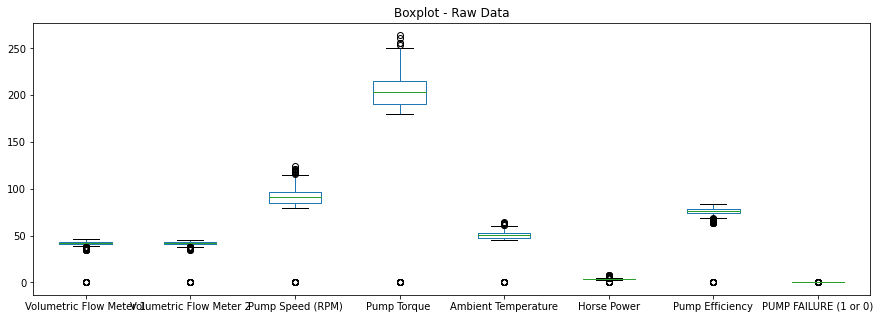

In [36]:
mpl.rcParams['figure.figsize'] = (15,5)
dataframe_raw.plot(kind='box')
plt.title("Boxplot - Raw Data")


Text(0.5, 1.0, 'Raw Timeseries Plot')

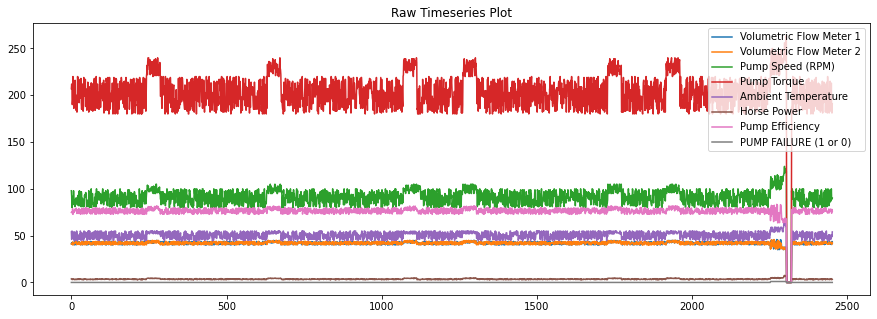

In [37]:
dataframe_raw.plot()
plt.title("Raw Timeseries Plot")

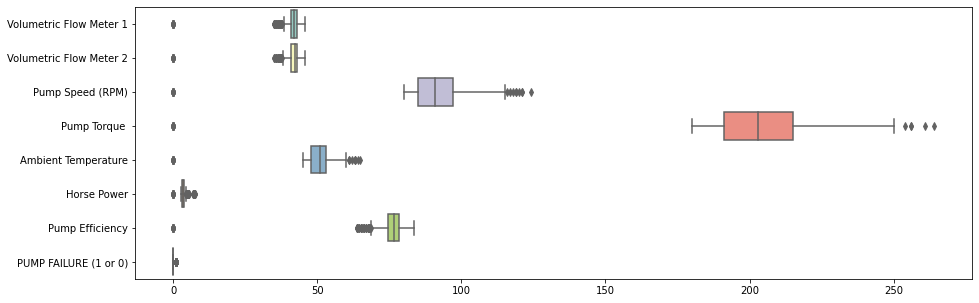

In [38]:
mpl.rcParams['figure.figsize'] = (15,5)
sns.boxplot(data=dataframe_raw, palette="Set3", orient='h')

### **What have you observed from the boxplot and line plots?**

In [39]:
#The box plots show the mean, interquartile ranges and outliers in each variable dataset. With the line plots, you 
#can see how all of the variables change over time. We are primarily focused on how the variables change when there 
#is a Pump Failure. The Seaborn boxplots are much clearer and easier to read.

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered Dataframes with Box Plots</span> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the Pump has failed (i.e. Pump Failure = 1)  and 0 (Pump is in normal operations). 


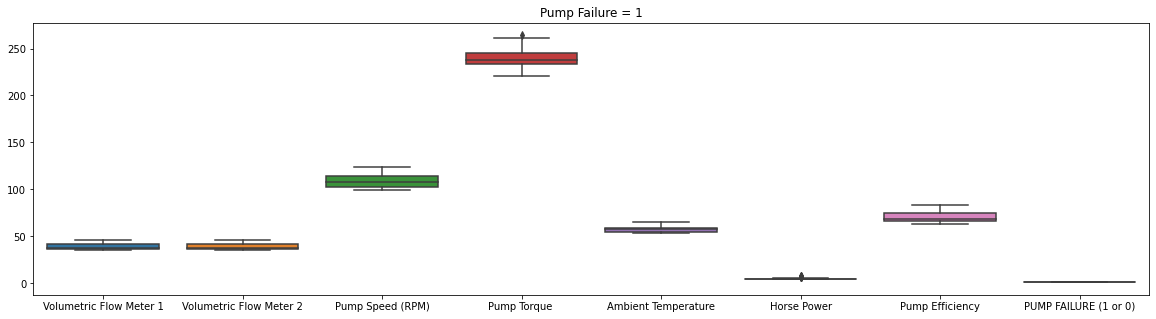

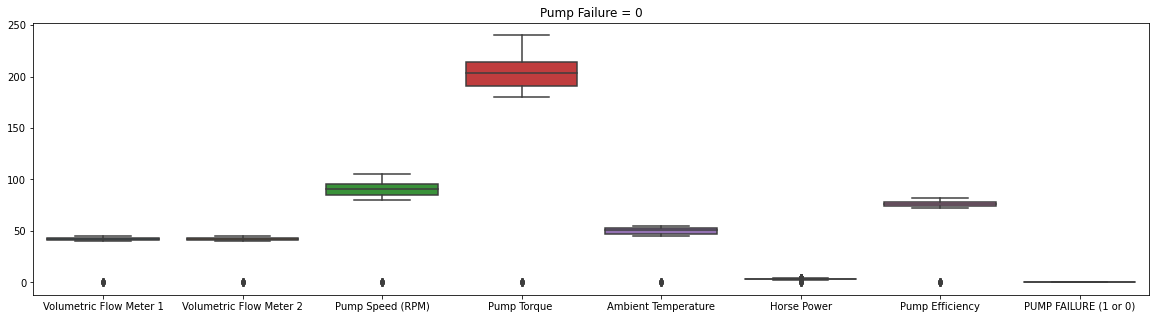

In [40]:
mpl.rcParams['figure.figsize'] = (20,5)

#Filter when Pump Failure = 1 & when pump Failure = 0 

#Plot 1

dataframe_pump_failed = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)']==1]
plt.title("Pump Failure = 1")
sns.boxplot(data=dataframe_pump_failed)
#or dataframe_pump_failed.plot(kind='box')
plt.show()

dataframe_pump_not_failed = dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)']==0]
plt.title("Pump Failure = 0")
sns.boxplot(data=dataframe_pump_not_failed)
#or dataframe_pump_not_failed.plot(kind='box')
plt.show()

### What have you noticed when you compared the dataset in this manner?

In [41]:
#You can compare a box plot of the same variable when the pump has failed and when it hasn't to see how the mean, 
#range and outliers change. The Pump Failure = 0 box plot has a number of outliers at zero.

---------------------------------------------------------------------------

### Step 5: <span style="color:green">Create Quartiles</span> 

i) Create two new variables called Q1 and Q3. 

Q1 should contain the 25th percentile for all columns in the dataframe while Q3 should contain the 75th percentile for all the columns in the dataframe.

ii) Calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the dataframe and print it to the screen.

In [42]:
Q1 = dataframe_raw.quantile(q = 0.25)
Q3 = dataframe_raw.quantile(q = 0.75)
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### Step 6: <span style="color:green">Identify Outliers</span> 

i) Calculate how many entries you currently have in the original dataframe.

ii) Using the quartiles and IQR previously calculated, identify the number of entries you'd have if you were to remove the outliers.

ii) Find the proportion of outliers that exist in the dataset.


In [43]:
print ("When we have not removed any outliers from the dataset, we have " + str(len(dataframe_raw)) + " entries") 

df_o = dataframe_raw[~((dataframe_raw < (Q1 - 1.5 * IQR)) |(dataframe_raw > (Q3 + 1.5 * IQR))).any(axis=1)]

print ("When we have removed all outliers from the dataset, we have " + str(len(df_o)) + " entries")
print ("The proportion of outliers which exist when compared to the dataframe are: " + str(len(df_o)/len(dataframe_raw)))

When we have not removed any outliers from the dataset, we have 2453 entries
When we have removed all outliers from the dataset, we have 2358 entries
The proportion of outliers which exist when compared to the dataframe are: 0.9612719119445576


### Having removed the outliers from the dataset - do we think this is a good option? Why or why not?

In [44]:
#It's usually a good option  to remove outliers because you can get a picture of how the outliers affect the data and 
#if outliers are skewing the data and making it difficult to recognize trends.

---------------------------------------------------------------------------

### Step 7: <span style="color:green">Create a Boxplot without Outliers</span> 

With the dataset now stripped of outliers, create the following boxplots:

i) A boxplot when PUMP FAILURE is 1 (Check what the **length** of the dataframe is before you try and plot this. You may be surprised!)

ii) A boxplot when PUMP FAILURE is 0 

0


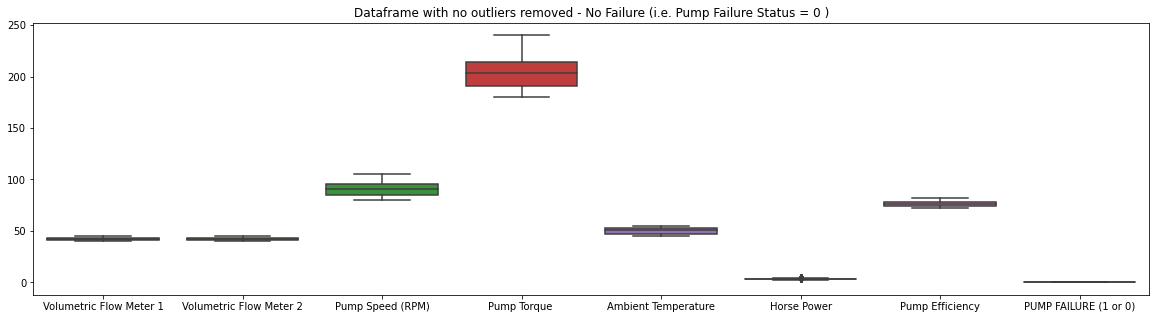

In [45]:
mpl.rcParams['figure.figsize'] = (20,5)
df_o_failures = df_o[df_o['PUMP FAILURE (1 or 0)']==1]
print(len(df_o_failures)) #shows there is nothing to plot
sns.boxplot(data=df_o_failures)
#or df_o_failures.plot(kind='box')
plt.title("Dataframe with no outliers removed - Failure")

df_o_no_failures = df_o[df_o['PUMP FAILURE (1 or 0)']==0]
sns.boxplot(data=df_o_no_failures)
#or df_o_no_failures.plot(kind='box')
plt.title("Dataframe with no outliers removed - No Failure (i.e. Pump Failure Status = 0 )")
plt.show()

In [46]:
#The "0" return of the first Box Plot above shows that when we remove the outliers and the Pump is in Failure mode,
# there is no data. The outliers contain the insights so never remove them without Subject Matter Expertise input!

-----

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

#### Loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends.


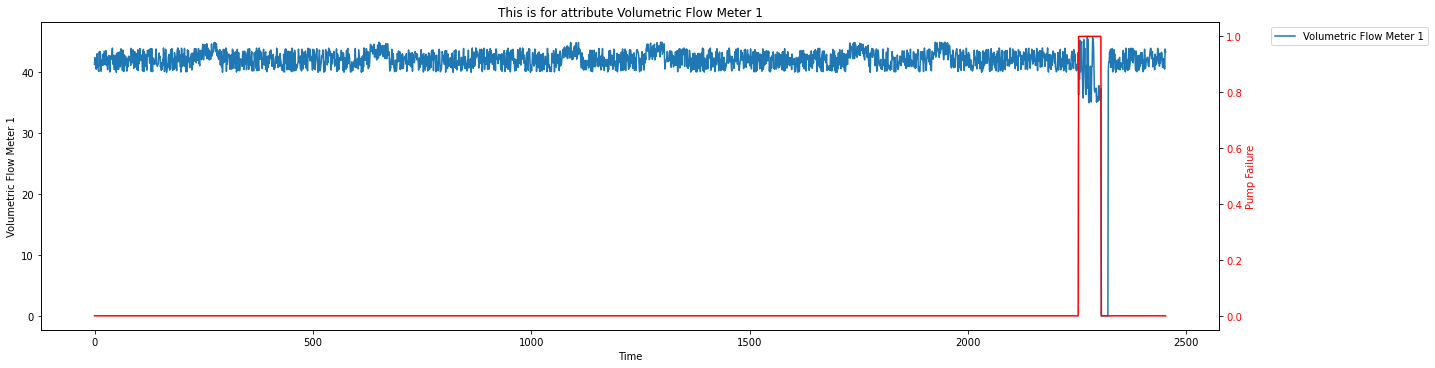

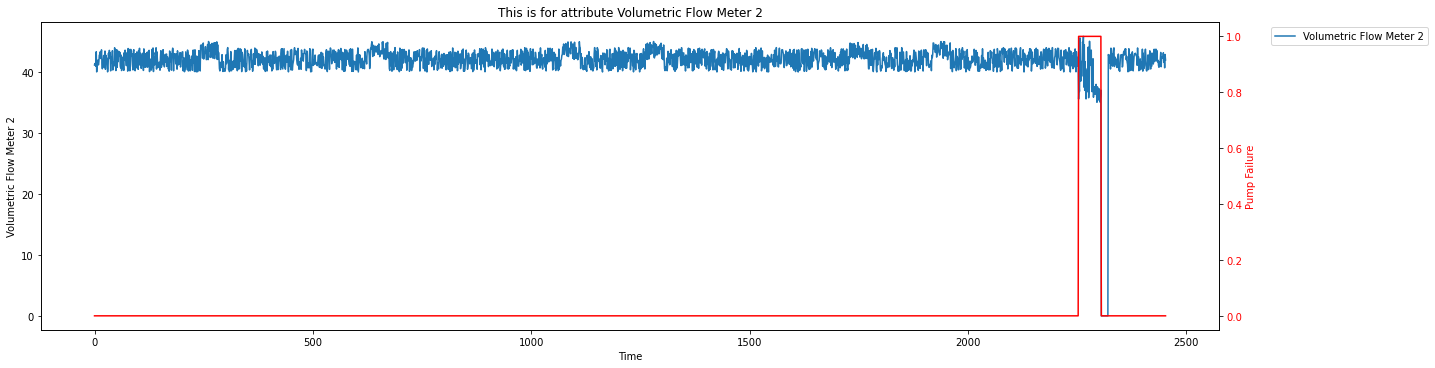

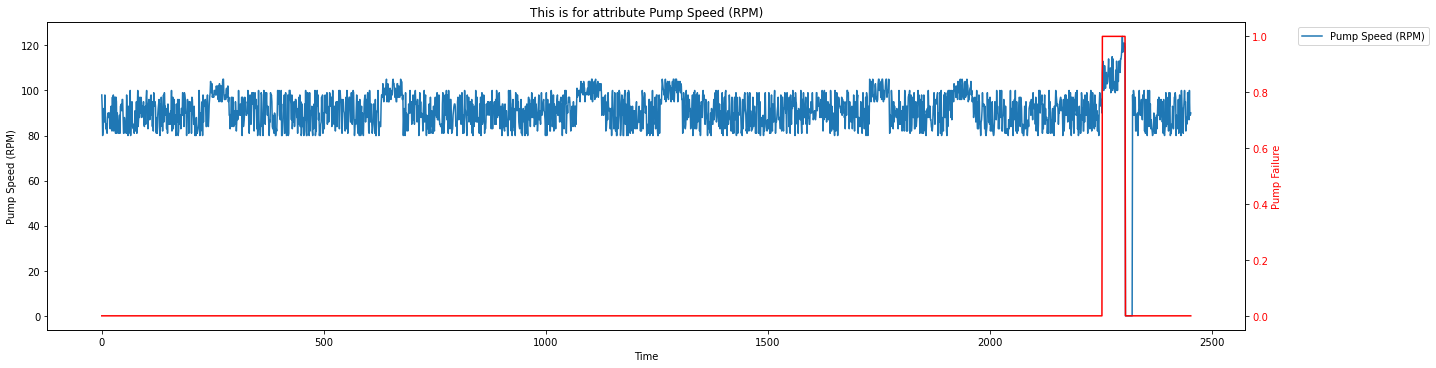

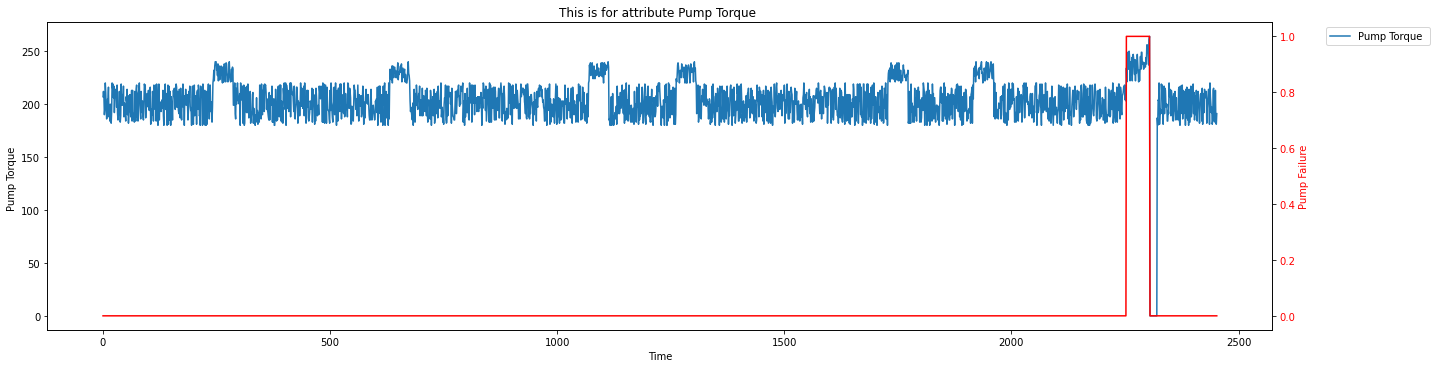

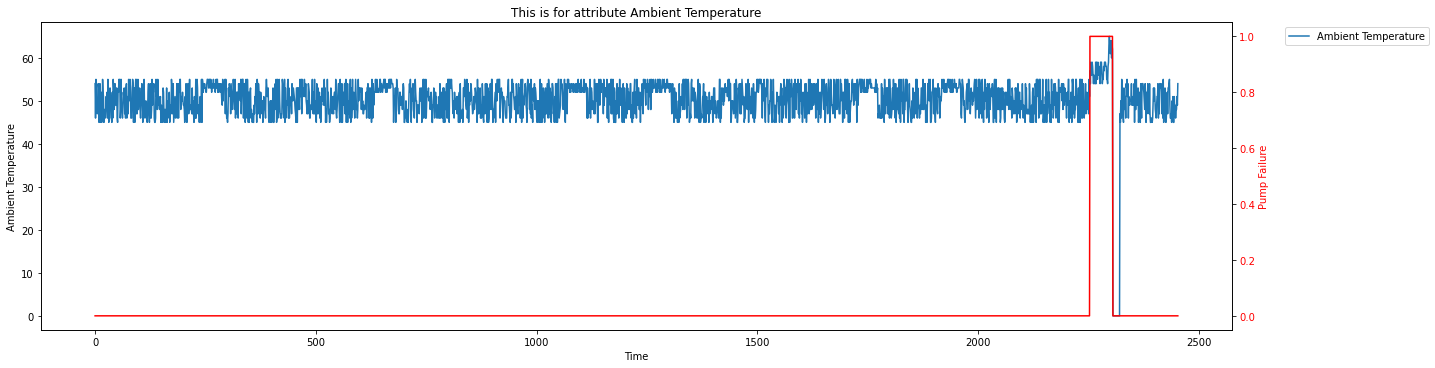

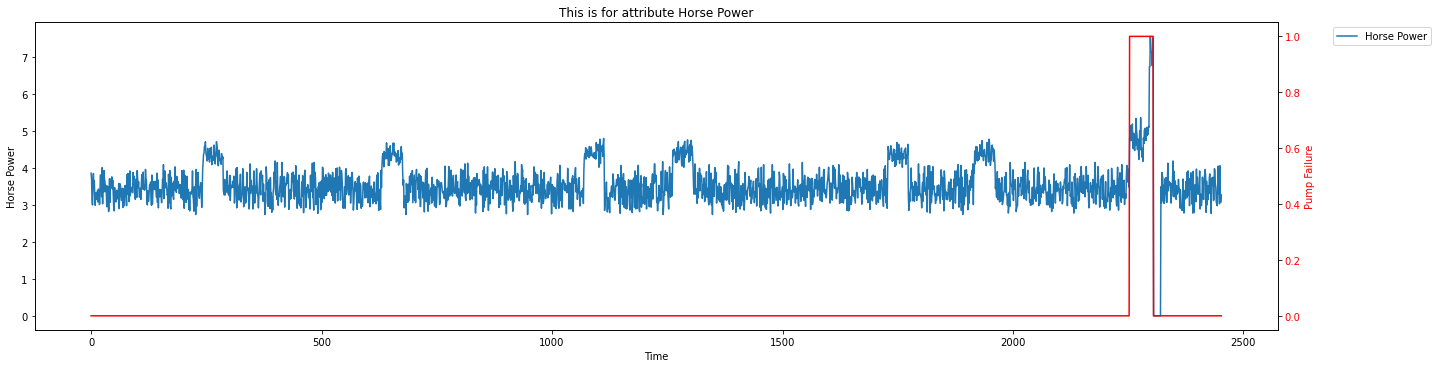

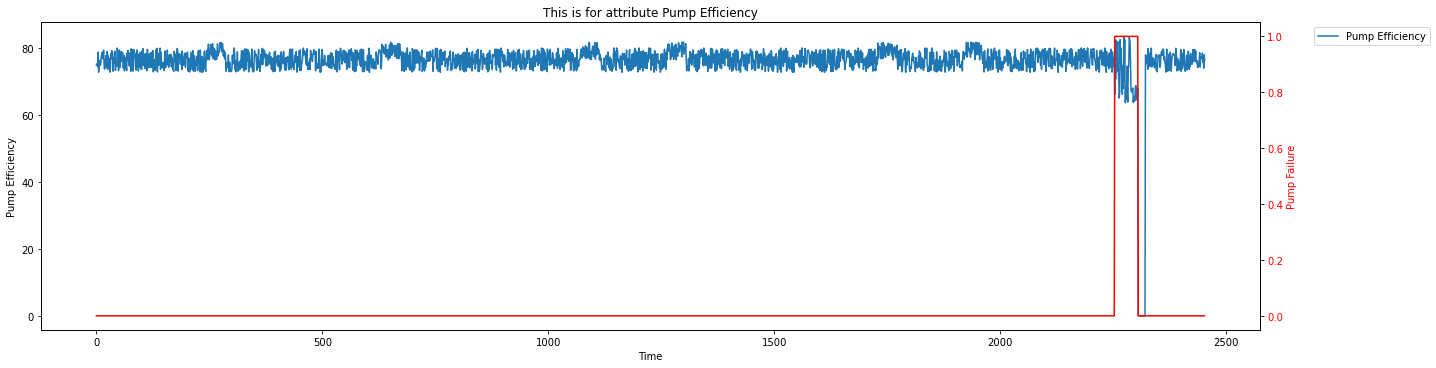

In [47]:
listOfVariables = dataframe_raw.drop(['PUMP FAILURE (1 or 0)','Data Source','TIMEFRAME (DD/MM/YYYY)'], axis=1).columns

for i in listOfVariables:
    failureState = dataframe_raw['PUMP FAILURE (1 or 0)']
    ax = dataframe_raw[i].plot()
    ax.set_xlabel('Time')
    ax.set_ylabel(i)
    ax.tick_params(axis='y')
    ax2 = ax.twinx()
    ax2.plot(failureState, 'red')
    ax2.set_ylabel('Pump Failure', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout()
    plt.title("This is for attribute " + i)
    plt.show()

### What do you notice when looking at the data in this way? Do any particular trends emerge?

In [48]:
#When looking at the data this way, you can see how the variables correlate with Pump Failure. Ambient Temperature, 
#Horse Power, Pump Speed, and Pump Torque all show an increase with Pump Failure. 
#Pump Efficiency and Volumetric Flow meter 1 & 2 all show a decrease with Pump Failure.

---

### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index** of the dataframe to the TIMEFRAME (DD/MM/YYYY) attribute

ii) Exactly as you did in Q8, Re-plot all variables, now transformed via a rolling standard deviation in the dataframe_stdev for the time period 10/12/2014 13:30 to 10/12/2014 14:30 against Pump Failure.


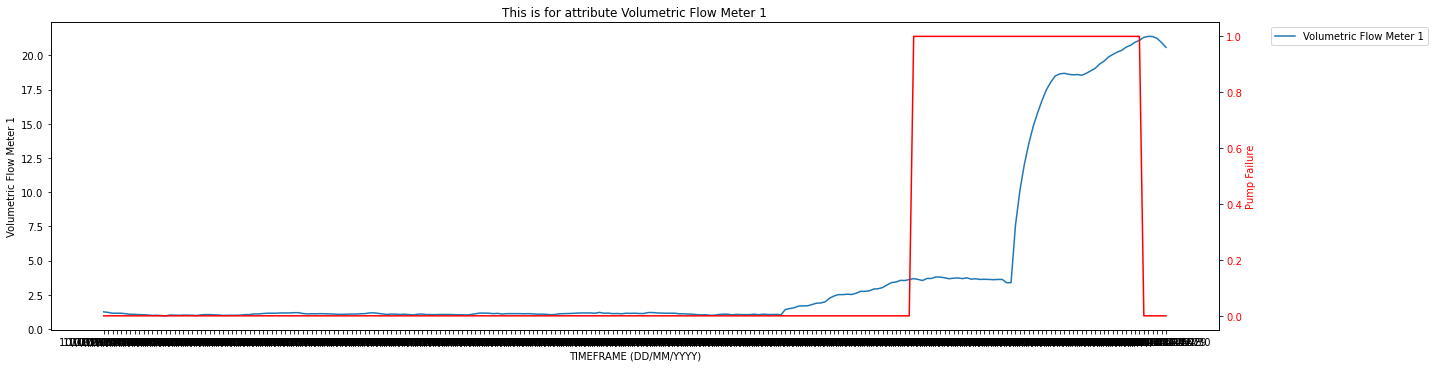

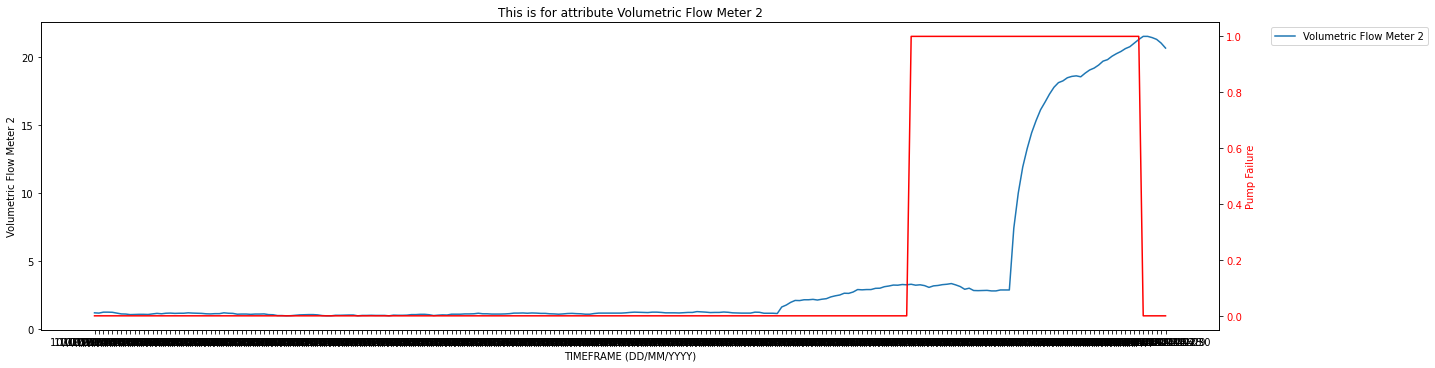

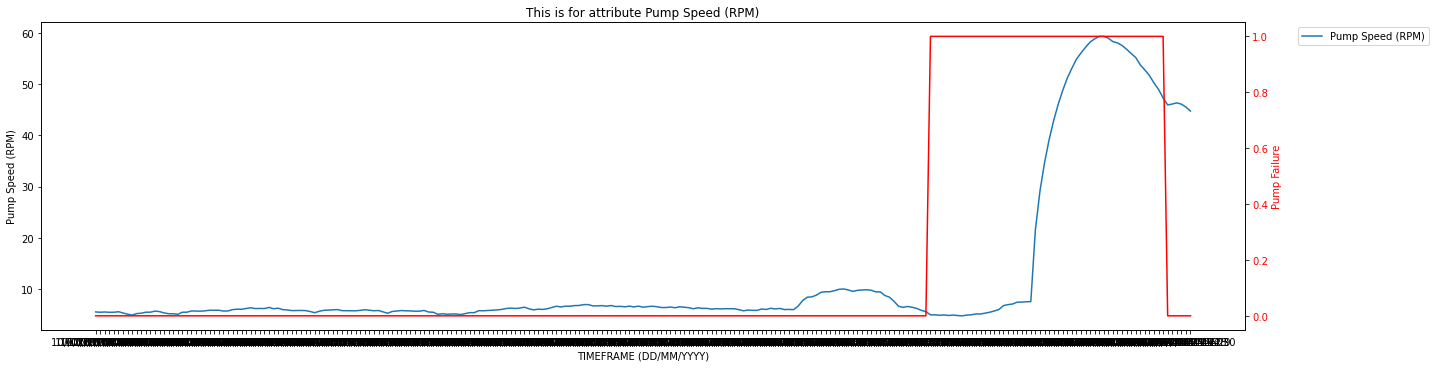

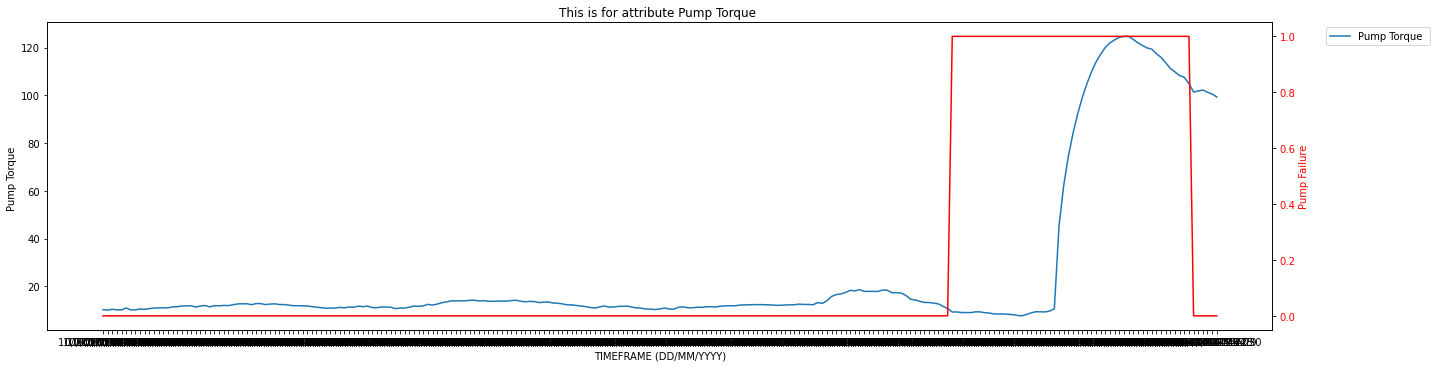

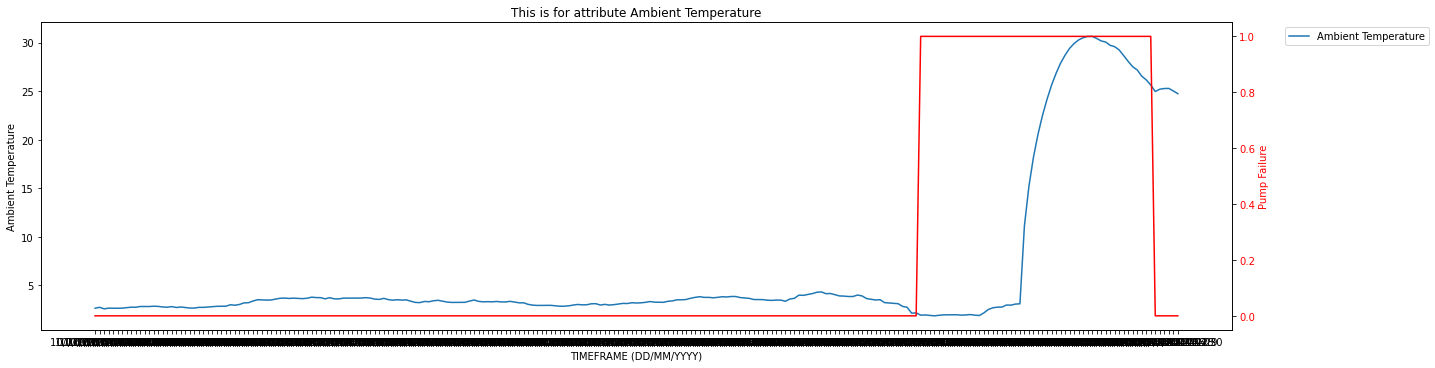

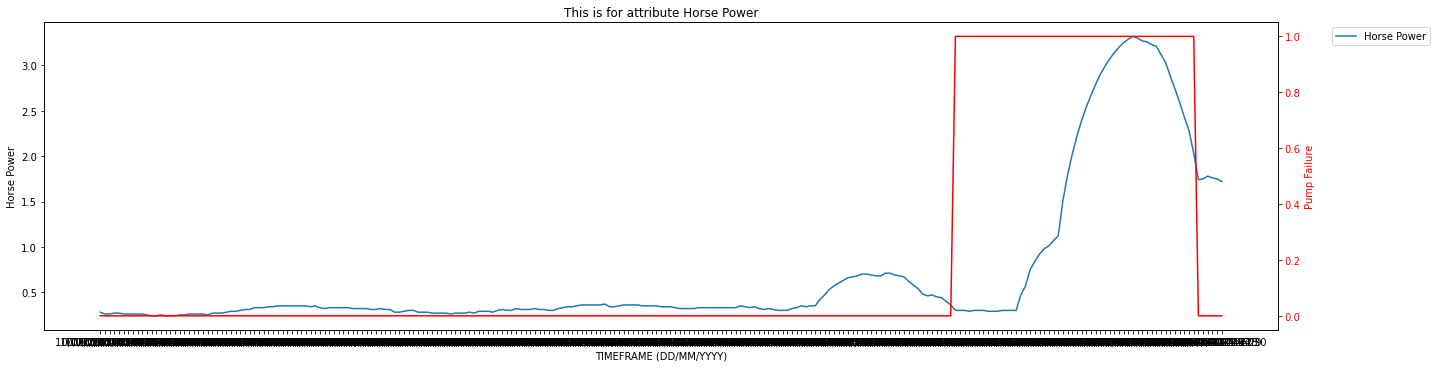

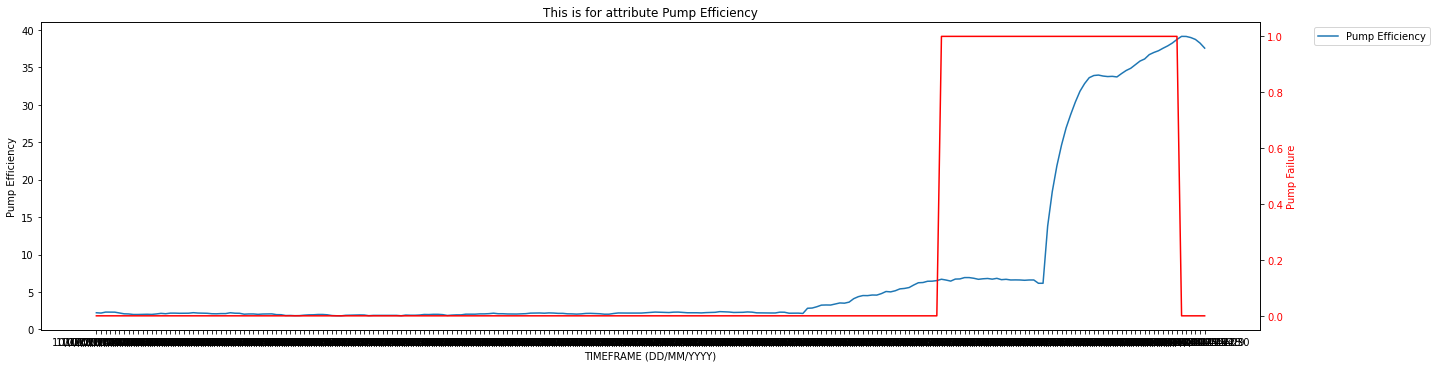

In [49]:
dataframe_stdev.set_index("TIMEFRAME (DD/MM/YYYY)",inplace=True)
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 10:30")&((dataframe_stdev.index <= "10/12/2014 14:30"))]

listOfVariables = dataframe_time_filtered.drop(['PUMP FAILURE (1 or 0)','Data Source'], axis=1).columns

for i in listOfVariables:
    failureState = dataframe_time_filtered['PUMP FAILURE (1 or 0)']
    ax = dataframe_time_filtered[i].plot()
    ax.set_ylabel(i)
    ax.tick_params(axis='y')
    ax2 = ax.twinx()
    ax2.plot(failureState, 'red')
    ax2.set_ylabel('Pump Failure', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.tight_layout()
    plt.title("This is for attribute " + i)
    plt.show()

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

 ### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_raw dataset.

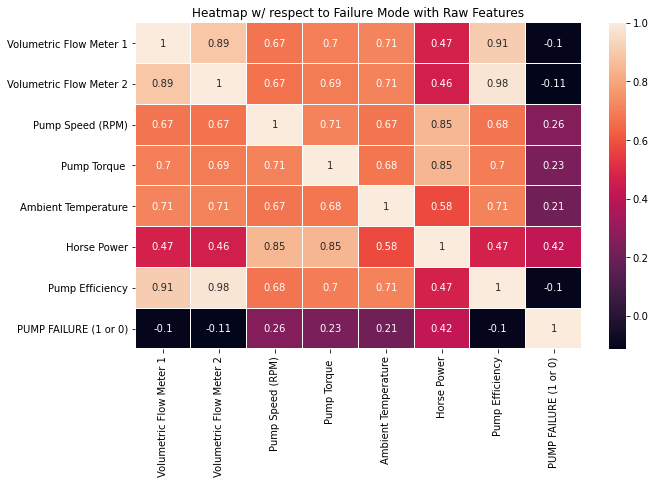

In [50]:
corr = dataframe_raw.drop(['Data Source', 'TIMEFRAME (DD/MM/YYYY)'],axis=1).corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Raw Features")
plt.show()

**Open-ended Question:**

Which variables seem to correlate with Pump Failure?


In [51]:
print('Horse Power, Pump Speed, Pump Torque and Ambient Temperature.')

Horse Power, Pump Speed, Pump Torque and Ambient Temperature.



### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
Create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order.


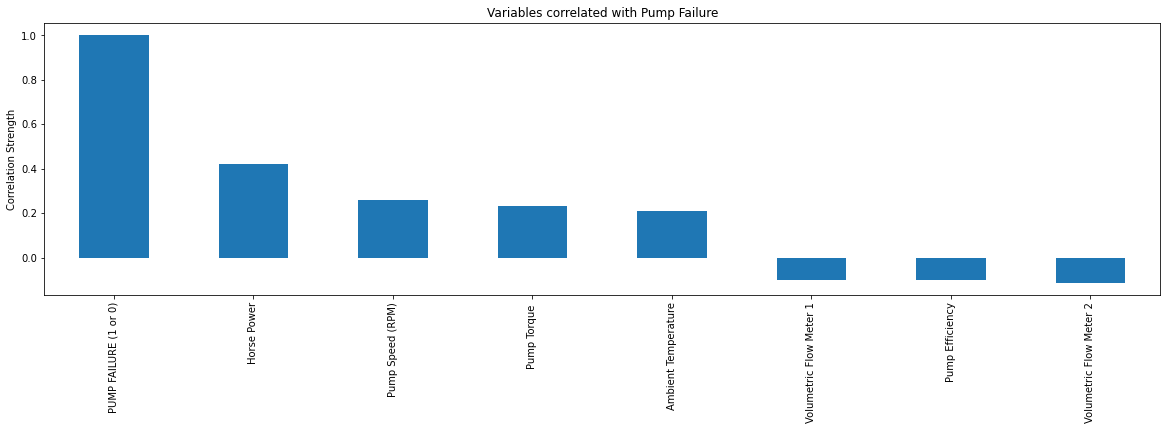

In [52]:
corr = corr.sort_values("PUMP FAILURE (1 or 0)", ascending=False)
corr['PUMP FAILURE (1 or 0)'].plot(kind='bar')
plt.title("Variables correlated with Pump Failure")
plt.ylabel("Correlation Strength")
plt.show()

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 

ii) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R Squared) for all variables using the dataframe_stdev dataset.

Do any variables stand out? If yes, list these out below your heatmap.


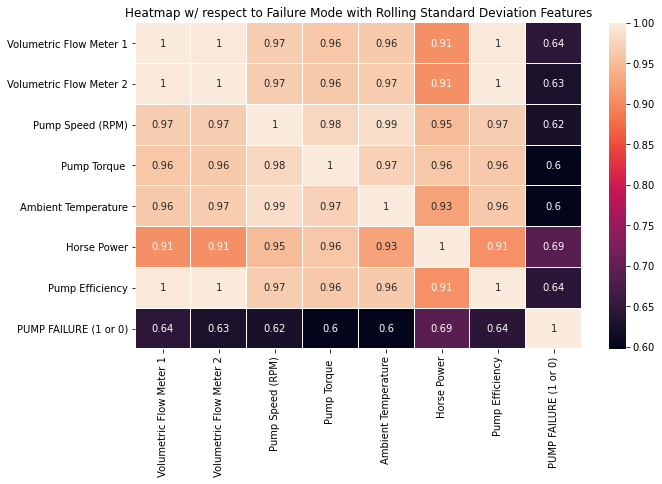

In [53]:
corr = dataframe_stdev.drop(['Data Source'],axis=1).corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap w/ respect to Failure Mode with Rolling Standard Deviation Features")
plt.show()

In [54]:
print('The variables that stand out include Horse Power, Volumetric Flow Meter 1, Pump Efficiency, & Volumetric Flow Meter 2.')

The variables that stand out include Horse Power, Volumetric Flow Meter 1, Pump Efficiency, & Volumetric Flow Meter 2.


### Creating a Multivariate Regression Model


### Step 13: <span style="color:purple">Use OLS Regression</span> 
i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables, which include every other variable that is not PUMP FAILURE (1 or 0).

ii) Repeat i) but this time use the dataframe_stdev you imported previously. What is the R Squared for the model and what does this signify?

In [55]:
X = dataframe_raw.drop(columns=['Data Source','PUMP FAILURE (1 or 0)','TIMEFRAME (DD/MM/YYYY)'])
Y = dataframe_raw['PUMP FAILURE (1 or 0)']

OLSmodel = sm.OLS(Y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary(title='OLS Regression Results - Raw Data')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results - Raw Data                             
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.371
Model:                               OLS   Adj. R-squared (uncentered):              0.369
Method:                    Least Squares   F-statistic:                              206.1
Date:                   Wed, 09 Dec 2020   Prob (F-statistic):                   7.29e-241
Time:                           11:18:25   Log-Likelihood:                          1814.7
No. Observations:                   2453   AIC:                                     -3615.
Df Residuals:                       2446   BIC:                                     -3575.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1    -0.0139      0.002     -7.666      0.000      -0.017      -0.010
Volumetric Flow Meter 2    -0.0178      0.003     -5.302      0.000      -0.024      -0.011
Pump Speed (RPM)            0.0027      0.001      3.305      0.001       0.001       0.004
Pump Torque                 0.0009      0.000      2.444      0.015       0.000       0.002
Ambient Temperature         0.0102      0.001     14.464      0.000       0.009       0.012
Horse Power                 0.0701      0.019      3.746      0.000       0.033       0.107
Pump Efficiency             0.0020      0.002      1.010      0.313      -0.002       0.006
==============================================================================
Omnibus:                     2053.340   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56905.683
Skew:                           3.886   Prob(JB):                         0.00
Kurtosis:                      25.279   Cond. No.                     2.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
X= dataframe_stdev.drop(columns=['Data Source','PUMP FAILURE (1 or 0)'],axis=1)
Y= dataframe_stdev['PUMP FAILURE (1 or 0)']

OLSmodel = sm.OLS(Y, X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared (uncentered):                   0.774
Model:                               OLS   Adj. R-squared (uncentered):              0.773
Method:                    Least Squares   F-statistic:                              1195.
Date:                   Wed, 09 Dec 2020   Prob (F-statistic):                        0.00
Time:                           11:18:25   Log-Likelihood:                          3067.8
No. Observations:                   2452   AIC:                                     -6122.
Df Residuals:                       2445   BIC:                                     -6081.
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Volumetric Flow Meter 1     0.0650      0.010      6.414      0.000       0.045       0.085
Volumetric Flow Meter 2    -0.5695      0.020    -28.477      0.000      -0.609      -0.530
Pump Speed (RPM)           -0.0235      0.002    -12.253      0.000      -0.027      -0.020
Pump Torque                -0.0209      0.001    -25.204      0.000      -0.023      -0.019
Ambient Temperature         0.0153      0.003      4.877      0.000       0.009       0.021
Horse Power                 0.7928      0.022     35.982      0.000       0.750       0.836
Pump Efficiency             0.3243      0.012     26.478      0.000       0.300       0.348
==============================================================================
Omnibus:                      981.646   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47251.698
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                      24.386   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Open-ended Question:**

### Which linear regression model seems to be a better fit? Why do you think this is the case?


In [57]:
#R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates 
#the percentage of the variance in the dependent variable that the independent variables 
#explain collectively. Since the r-squared value for model_stdev is much closer to 1 than 
#the r-squared value for model_raw, the model_stdev has a better fit than the the model_raw.
#   R-squared of model_raw = 0.371
#   R-squared of model_stdev = 0.774

### Step 14: <span style="color:purple">Validate Predictions</span> 
i) Use the regression equation you created in the previous step and apply the .predict() function to the dataframe to see whether or not your model 'picks' up the Pump Failure Event.  

ii) Plot the rolling linear regression equation against the attribute 'PUMP FAILURE (1 or 0)'

**Note:** Please ensure all axes are clearly labelled and ensure that you use Dual Axes to plot this.

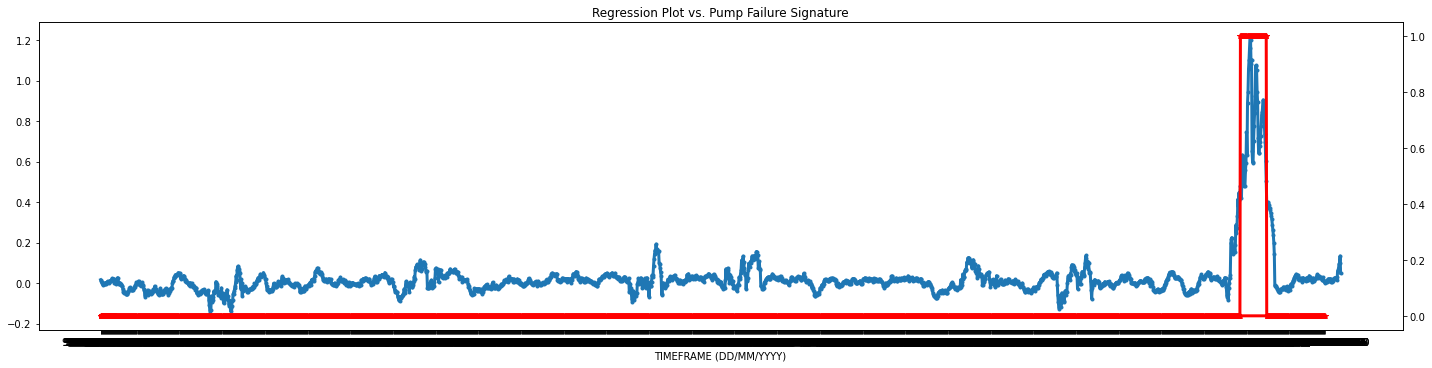

In [58]:
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker='.')
ax2 = ax.twinx()
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], 'red', linewidth=3, marker='*')
plt.tight_layout()
plt.title("Regression Plot vs. Pump Failure Signature")
plt.show()